# Deep Learning Workshop For Satellite Imagery

# Data Preprocessing

Using Map, We create Satellite Imagery Data.Map Data can be translated into three Segments 
Image Tile:
Label Data(Image Mask) Speific for Tile ID
Mask Labels (names)

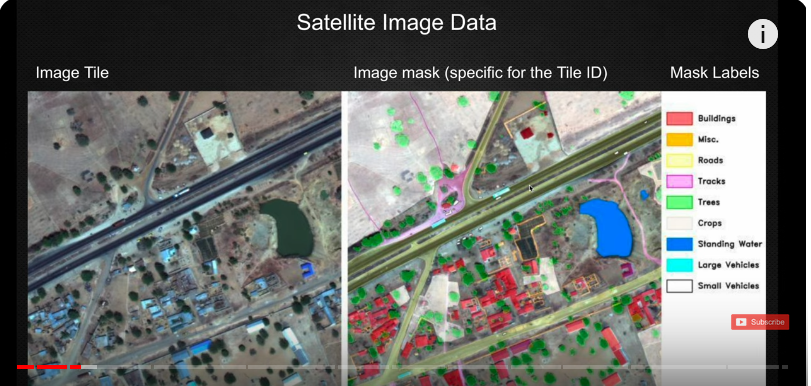

Satellite Data is a collection of hundreds or thousands of tiles
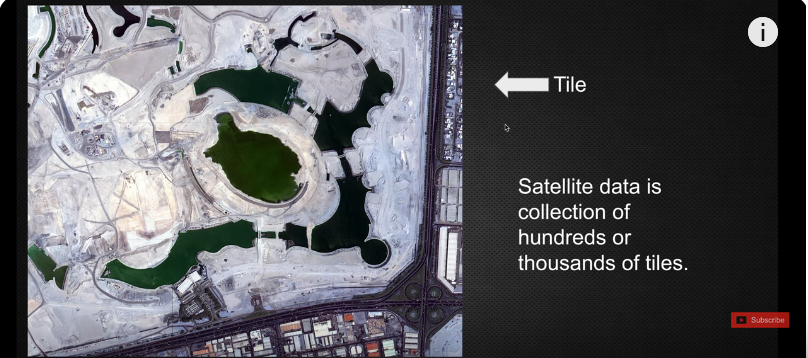

Tile Mask:
Each satellite tile has its mask image which has color labels for landmarks
The list of landmarks is the number of classes the model can classify in the satellite images

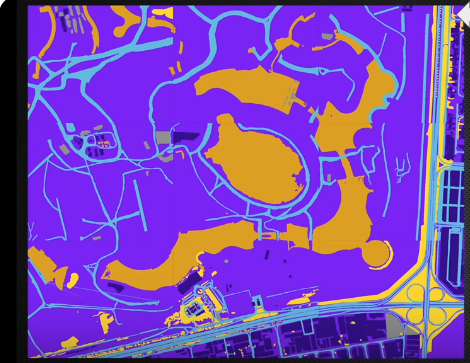

Tile: Each satellite tile is further divided into 2 by 2 or 3 by 3 or 4 by 4 images and in sometimes 1 by 3 or 4 by 5 images
    
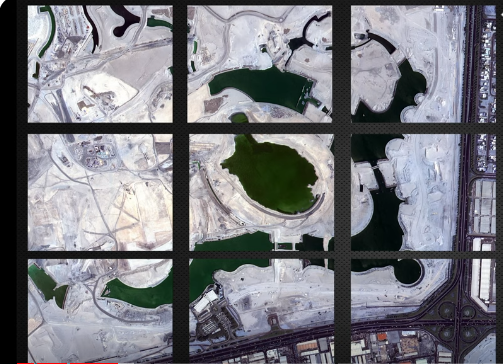

Tile Mask: Each satellite tile mask stay same with the size of further smaller size of image tile.
Tile and masks are either seperated into folders or have proper image ID to recognize them!

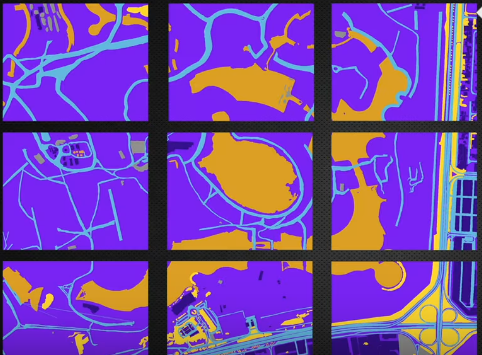

# Tile and Mask Processing:

# Mask Label Processing:

# Practical Implementation

In [6]:
import os

In [4]:
dataset_root_folder = 'Data/'

In [5]:
dataset_name = "DubaiDataset"

this code snippet walks through all the subdirectories under dataset_root_folder and prints the name of each subdirectory as it encounters them. It's a simple way to list the directory names in a directory tree.

In [7]:
for path,subdirs,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
    dir_name = path.split(os.path.sep)[-1]
    #print(dir_name)
    print(path)
    
    #If you wana see images in the form of list
    if dir_name == 'images':
        images = os.listdir(path)
        #print(images)
        
    #for i, image_name in enumerate(images):
        #if (image_name.endswith(".jpg")): 
            #print(image_name)
            
#The enumerate function in Python is a built-in function that is used to iterate over a sequence (such as a list, tuple, or string) while keeping track of the index (position) of the current item. It is often used in for loops when you need to access both the value and its index within the sequence.


 #If you wana see masks images in the form of list
if dir_name == 'masks':
    images = os.listdir(path)
    #print(images)
    
#for i, mask_name in enumerate(masks):
        #if (mask_name.endswith(".png")): 
            #print(mask_name)

Data/DubaiDataset
Data/DubaiDataset/Tile 2
Data/DubaiDataset/Tile 2/images
Data/DubaiDataset/Tile 2/masks
Data/DubaiDataset/Tile 7
Data/DubaiDataset/Tile 7/images
Data/DubaiDataset/Tile 7/masks
Data/DubaiDataset/Tile 1
Data/DubaiDataset/Tile 1/images
Data/DubaiDataset/Tile 1/masks
Data/DubaiDataset/Tile 4
Data/DubaiDataset/Tile 4/images
Data/DubaiDataset/Tile 4/masks
Data/DubaiDataset/Tile 5
Data/DubaiDataset/Tile 5/images
Data/DubaiDataset/Tile 5/masks
Data/DubaiDataset/Tile 6
Data/DubaiDataset/Tile 6/images
Data/DubaiDataset/Tile 6/masks
Data/DubaiDataset/Tile 8
Data/DubaiDataset/Tile 8/images
Data/DubaiDataset/Tile 8/masks
Data/DubaiDataset/Tile 3
Data/DubaiDataset/Tile 3/images
Data/DubaiDataset/Tile 3/masks


# How to read this images

In [35]:
!pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 386.9 kB/s eta 0:00:00m eta 0:00:010:00:05


In [2]:
import cv2

In [5]:
image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_003.jpg',1)

In [6]:
image.shape    #height , width , color

(544, 509, 3)

In [7]:
#Each folder contain different height and width images ensure uniformity

# Reading and Processing Satellite Images (This method will read all the images and then crop and patchify them)

In [8]:
image_dataset = []
#Our dataset is divided into tile id and also image id
#image_extension = 'jpg'
image_extension = 'png'
image_type = 'masks'
for title_id in range(1,8):
    for image_id in range(1 , 8):
        #image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/images/image_part_00{image_id}.{image_extension}',1)
        image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/{image_type}/image_part_00{image_id}.{image_extension}',1)
        
        if image is not None:
            print(image.shape)

            
#Output:
#Height , Width , Channel


(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(643, 797, 3)
(643, 797, 3)
(643, 797, 3)
(644, 797, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)
(2062, 1817, 3)
(2062, 1816, 3)
(2062, 1817, 3)
(2061, 1817, 3)


# Tile and Mask Processing:

In [13]:
image_patch_size = 256

In [30]:
image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_003.jpg',1)

In [15]:
image.shape

(544, 509, 3)

In [21]:
(image.shape[0]//image_patch_size)*image_patch_size     #Since 544 is not a multiple of 256, there will be some overlap

2048

In [18]:
(image.shape[1]//image_patch_size)*image_patch_size     #multiple of patch size

256

In [20]:
image_dataset = []
#Our dataset is divided into tile id and also image id
#image_extension = 'jpg'
image_extension = 'jpg'
image_type = 'images'
for title_id in range(1,8):
    for image_id in range(1 , 8):
        #image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/images/image_part_00{image_id}.{image_extension}',1)
        image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/{image_type}/image_part_00{image_id}.{image_extension}',1)
        
        if image is not None:
            size_x = (image.shape[1]//image_patch_size)*image_patch_size 
            size_y = (image.shape[0]//image_patch_size)*image_patch_size 
            print("{}----{} - {}".format(image.shape , size_x , size_y))
            #print(image.shape)
            
#image.shape[1] is the width of the image.
#image.shape[0] is the height of the image.
#image_patch_size is the desired size for each patch.
#These lines calculate the adjusted width (size_x) and height (size_y) by finding the closest multiple of image_patch_size that is less than or equal to the original width and height.


#OutPut
#Indicates that the original image had a shape of (644, 797, 3), and the adjusted sizes are 768 (width) and 512 (height), making them multiples of the specified image_patch_size.

(644, 797, 3)----768 - 512
(644, 797, 3)----768 - 512
(644, 797, 3)----768 - 512
(643, 797, 3)----768 - 512
(643, 797, 3)----768 - 512
(643, 797, 3)----768 - 512
(644, 797, 3)----768 - 512
(544, 509, 3)----256 - 512
(544, 510, 3)----256 - 512
(544, 509, 3)----256 - 512
(544, 509, 3)----256 - 512
(544, 510, 3)----256 - 512
(544, 509, 3)----256 - 512
(544, 509, 3)----256 - 512
(658, 682, 3)----512 - 512
(658, 682, 3)----512 - 512
(658, 682, 3)----512 - 512
(658, 682, 3)----512 - 512
(658, 682, 3)----512 - 512
(658, 682, 3)----512 - 512
(658, 682, 3)----512 - 512
(846, 1099, 3)----1024 - 768
(846, 1099, 3)----1024 - 768
(846, 1099, 3)----1024 - 768
(846, 1099, 3)----1024 - 768
(846, 1099, 3)----1024 - 768
(846, 1099, 3)----1024 - 768
(846, 1099, 3)----1024 - 768
(1058, 1126, 3)----1024 - 1024
(1058, 1126, 3)----1024 - 1024
(1058, 1126, 3)----1024 - 1024
(1058, 1126, 3)----1024 - 1024
(1058, 1126, 3)----1024 - 1024
(1058, 1126, 3)----1024 - 1024
(1058, 1126, 3)----1024 - 1024
(838, 859, 3)

# Check Type of Image:

In [22]:
print(type(image))

<class 'numpy.ndarray'>


# Convert image into image type

In [23]:
from PIL import Image    #Using Pillow Library
import numpy as np

In [24]:
type(Image.fromarray(image))

PIL.Image.Image

In [25]:
image_dataset = []
#Our dataset is divided into tile id and also image id
#image_extension = 'jpg'
image_extension = 'jpg'
image_type = 'images'
for title_id in range(1,8):
    for image_id in range(1 , 8):
        #image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/images/image_part_00{image_id}.{image_extension}',1)
        image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/{image_type}/image_part_00{image_id}.{image_extension}',1)
        
        if image is not None:
            size_x = (image.shape[1]//image_patch_size)*image_patch_size 
            size_y = (image.shape[0]//image_patch_size)*image_patch_size 
            image = Image.fromarray(image)
            image = image.crop((0,0,size_x,size_y))
# 0: Leftmost pixel coordinate.
#0: Uppermost pixel coordinate.
#size_x: Rightmost pixel coordinate.
#size_y: Lowermost pixel coordinate.
            print("({} , {})".format(image.size[0] , image.size[1]))
            #print(image.shape)
        
#OutPut
#image.size[0]: Width of the image.
#image.size[1]: Height of the image.

(768 , 512)
(768 , 512)
(768 , 512)
(768 , 512)
(768 , 512)
(768 , 512)
(768 , 512)
(256 , 512)
(256 , 512)
(256 , 512)
(256 , 512)
(256 , 512)
(256 , 512)
(256 , 512)
(512 , 512)
(512 , 512)
(512 , 512)
(512 , 512)
(512 , 512)
(512 , 512)
(512 , 512)
(1024 , 768)
(1024 , 768)
(1024 , 768)
(1024 , 768)
(1024 , 768)
(1024 , 768)
(1024 , 768)
(1024 , 1024)
(1024 , 1024)
(1024 , 1024)
(1024 , 1024)
(1024 , 1024)
(1024 , 1024)
(1024 , 1024)
(768 , 768)
(768 , 768)
(768 , 768)
(768 , 768)
(768 , 768)
(768 , 768)
(768 , 768)
(1792 , 2048)
(1792 , 2048)
(1792 , 2048)
(1792 , 2048)
(1792 , 2048)
(1792 , 2048)
(1792 , 2048)


# Used Patchify make ensure that all the images patched based on multiple of 256 by 256

In [28]:
from patchify import patchify

In [27]:
!pip install patchify

In [31]:
image_patches = patchify(image,(image_patch_size , image_patch_size , 3),step = image_patch_size)

In [32]:
image_patches

array([[[[[[ 68,  76,  93],
           [ 28,  39,  53],
           [ 29,  45,  52],
           ...,
           [195, 184, 176],
           [165, 155, 145],
           [153, 143, 133]],

          [[ 68,  75,  92],
           [ 31,  40,  53],
           [ 28,  44,  51],
           ...,
           [166, 155, 147],
           [156, 146, 136],
           [151, 141, 131]],

          [[ 66,  71,  86],
           [ 34,  42,  55],
           [ 32,  45,  53],
           ...,
           [146, 135, 127],
           [148, 138, 128],
           [154, 144, 134]],

          ...,

          [[ 74,  80,  91],
           [ 77,  83,  94],
           [ 78,  84,  95],
           ...,
           [177, 179, 179],
           [178, 179, 177],
           [172, 173, 169]],

          [[ 75,  79,  90],
           [ 78,  82,  93],
           [ 79,  83,  94],
           ...,
           [182, 184, 184],
           [180, 181, 179],
           [177, 178, 174]],

          [[ 77,  78,  88],
           [ 79,  81,  91]

In [33]:
len(image_patches)

2

In [35]:
image_dataset = []
#Our dataset is divided into tile id and also image id
#image_extension = 'jpg'
image_extension = 'jpg'
image_type = 'images'
for title_id in range(1,8):
    for image_id in range(1 , 8):
        #image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/images/image_part_00{image_id}.{image_extension}',1)
        image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/{image_type}/image_part_00{image_id}.{image_extension}',1)
        
        if image is not None:
            size_x = (image.shape[1]//image_patch_size)*image_patch_size 
            size_y = (image.shape[0]//image_patch_size)*image_patch_size 
            image = Image.fromarray(image)
            image = image.crop((0,0,size_x,size_y))
            #print("({} , {})".format(image.size[0] , image.size[1]))
            #print(image.shape)
            image=np.array(image)
            patched_images = patchify(image,(image_patch_size , image_patch_size , 3),step = image_patch_size)
            #print(len(patched_images))
            #patched_images.shape[0] corresponds to the height of the array (number of patches in the vertical direction).
            #patched_images.shape[1] corresponds to the width of the array (number of patches in the horizontal direction).
            
            for i in range(patched_images.shape[0]):
                for j in range(patched_images.shape[1]):
                    individual_patched_image = patched_images[i,j,:,:]  #The : in the indexing means "all elements along this axis."
                    print(individual_patched_image.shape)
#Output:

    #Dimension 1 (1):
        #In this context, the value 1 in the first dimension typically represents the number of channels. For example, if you are working with color images in RGB format, you have 3 color channels (Red, Green, Blue). In this case, 1 might indicate that there is only one channel, which could be grayscale.

    #Dimension 2 (256):
        #This represents the height of the array or image. In this case, the height is 256 pixels.

    #Dimension 3 (256):
        #This represents the width of the array or image. In this case, the width is 256 pixels.

    #Dimension 4 (3):
        #This represents the number of color channels. In this case, 3 indicates that there are three color channels (Red, Green, Blue), which is common for RGB color images.

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 

# Normalizing Images

# using MinMax scaler convert each image pixel into 0 and 1

In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [37]:
minmaxscaler = MinMaxScaler()

# PreProcessing Images

In [43]:
image_dataset = []
#Our dataset is divided into tile id and also image id
#image_extension = 'jpg'
image_extension = 'jpg'
image_type = 'images'
for title_id in range(1,8):
    for image_id in range(1 , 8):
        #image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/images/image_part_00{image_id}.{image_extension}',1)
        image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/{image_type}/image_part_00{image_id}.{image_extension}',1)
        
        if image is not None:
            size_x = (image.shape[1]//image_patch_size)*image_patch_size 
            size_y = (image.shape[0]//image_patch_size)*image_patch_size 
            image = Image.fromarray(image)
            image = image.crop((0,0,size_x,size_y))
            #print("({} , {})".format(image.size[0] , image.size[1]))
            #print(image.shape)
            image=np.array(image)
            patched_images = patchify(image,(image_patch_size , image_patch_size , 3),step = image_patch_size)
            #print(len(patched_images))
            for i in range(patched_images.shape[0]):
                for j in range(patched_images.shape[1]):
                    individual_patched_image = patched_images[i,j,:,:]
                    #print(individual_patched_image.shape)
                    individual_patched_image= minmaxscaler.fit_transform(individual_patched_image.reshape(-1 , individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                    individual_patched_image = individual_patched_image[0]
                    #print(individual_patched_image.shape)
                    image_dataset.append(individual_patched_image)

In [44]:
len(image_dataset)

735

# PreProcessing Masked Images

In [54]:
image_dataset = []
mask_dataset = []
# Our dataset is divided into tile id and also image id
# image_extension = 'jpg'

for title_id in range(1, 8):
    for image_type in ['images', 'masks']:
        if image_type == 'images':
            image_extension = 'jpg'
        elif image_type == 'masks':
            image_extension = 'png'

        for image_id in range(1, 8):
            # image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/images/image_part_00{image_id}.{image_extension}',1)
            image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/{image_type}/image_part_00{image_id}.{image_extension}', 1)

            if image is not None:
                size_x = (image.shape[1] // image_patch_size) * image_patch_size
                size_y = (image.shape[0] // image_patch_size) * image_patch_size
                image = Image.fromarray(image)
                image = image.crop((0, 0, size_x, size_y))
                image = np.array(image)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        individual_patched_image = patched_images[i, j, :, :]
                        individual_patched_image = minmaxscaler.fit_transform(
                            individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(
                            individual_patched_image.shape)

                        individual_patched_image = individual_patched_image[0]

                        if image_type == 'images':
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            mask_dataset.append(individual_patched_image)


In [55]:
print(len(image_dataset))
print(len(mask_dataset))

735
735


# Note:
    
    In the case of color images, the decoded images will have the channels stored in B G R order

In [58]:
image_dataset = []
mask_dataset = []
# Our dataset is divided into tile id and also image id
# image_extension = 'jpg'

for title_id in range(1, 8):
    for image_type in ['images', 'masks']:
        if image_type == 'images':
            image_extension = 'jpg'
        elif image_type == 'masks':
            image_extension = 'png'

        for image_id in range(1, 8):
            # image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/images/image_part_00{image_id}.{image_extension}',1)
            image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/{image_type}/image_part_00{image_id}.{image_extension}', 1)

            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
                size_x = (image.shape[1] // image_patch_size) * image_patch_size
                size_y = (image.shape[0] // image_patch_size) * image_patch_size
                image = Image.fromarray(image)
                image = image.crop((0, 0, size_x, size_y))
                image = np.array(image)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        individual_patched_image = patched_images[i, j, :, :]
                        individual_patched_image = minmaxscaler.fit_transform(
                            individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(
                            individual_patched_image.shape)

                        individual_patched_image = individual_patched_image[0]

                        if image_type == 'images':
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            mask_dataset.append(individual_patched_image)


# Only input data transforms using minmax

In [102]:
image_dataset = []
mask_dataset = []
# Our dataset is divided into tile id and also image id
# image_extension = 'jpg'

for title_id in range(1, 8):
    for image_type in ['images', 'masks']:
        if image_type == 'images':
            image_extension = 'jpg'
        elif image_type == 'masks':
            image_extension = 'png'

        for image_id in range(1, 8):
            # image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/images/image_part_00{image_id}.{image_extension}',1)
            image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id }/{image_type}/image_part_00{image_id}.{image_extension}', 1)

            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
                size_x = (image.shape[1] // image_patch_size) * image_patch_size
                size_y = (image.shape[0] // image_patch_size) * image_patch_size
                image = Image.fromarray(image)
                image = image.crop((0, 0, size_x, size_y))
                image = np.array(image)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        

                        if image_type == 'images':
                            individual_patched_image = patched_images[i, j, :, :]
                            individual_patched_image = minmaxscaler.fit_transform(
                            individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(
                            individual_patched_image.shape)
                            individual_patched_image = individual_patched_image[0]
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            individual_patched_mask = patched_images[i, j, :, :]
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)



# How MixMaxScaler works:

In [63]:
print(len(image_dataset))
print(len(mask_dataset))

735
735


# Rendering Source and Mask Images
Reading the processed image and mask dataset and check content

# Decimal values inside the image Array
its the normalize data which we have converted using MinMaxScaler function

In [65]:
image_dataset[0]

array([[[0.78823529, 0.76470588, 0.74509804],
        [0.88235294, 0.85882353, 0.83921569],
        [0.94509804, 0.90980392, 0.89411765],
        ...,
        [0.89411765, 0.85882353, 0.82352941],
        [0.85882353, 0.83137255, 0.79607843],
        [0.87843137, 0.85098039, 0.81568627]],

       [[0.88627451, 0.8627451 , 0.84313725],
        [0.99607843, 0.97254902, 0.95294118],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89803922, 0.8627451 ],
        [0.92941176, 0.90196078, 0.86666667],
        [0.95294118, 0.91764706, 0.88235294]],

       [[0.97254902, 0.94509804, 0.93333333],
        [1.        , 0.98823529, 0.97647059],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89411765, 0.86666667],
        [0.92156863, 0.89411765, 0.85882353],
        [0.90196078, 0.86666667, 0.83137255]],

       ...,

       [[0.88235294, 0.8627451 , 0.86666667],
        [0.81960784, 0.80392157, 0.8       ],
        [0.7372549 , 0

# Converted both image and mask dataset into array

In [109]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [110]:
print(image_dataset)
print(mask_dataset)

[[[[0.78823529 0.76470588 0.74509804]
   [0.88235294 0.85882353 0.83921569]
   [0.94509804 0.90980392 0.89411765]
   ...
   [0.89411765 0.85882353 0.82352941]
   [0.85882353 0.83137255 0.79607843]
   [0.87843137 0.85098039 0.81568627]]

  [[0.88627451 0.8627451  0.84313725]
   [0.99607843 0.97254902 0.95294118]
   [1.         1.         0.98431373]
   ...
   [0.93333333 0.89803922 0.8627451 ]
   [0.92941176 0.90196078 0.86666667]
   [0.95294118 0.91764706 0.88235294]]

  [[0.97254902 0.94509804 0.93333333]
   [1.         0.98823529 0.97647059]
   [1.         1.         0.98431373]
   ...
   [0.93333333 0.89411765 0.86666667]
   [0.92156863 0.89411765 0.85882353]
   [0.90196078 0.86666667 0.83137255]]

  ...

  [[0.88235294 0.8627451  0.86666667]
   [0.81960784 0.80392157 0.8       ]
   [0.7372549  0.73333333 0.71764706]
   ...
   [0.7254902  0.68235294 0.72156863]
   [0.85490196 0.82352941 0.86666667]
   [0.67843137 0.65882353 0.69411765]]

  [[0.76862745 0.75294118 0.74901961]
   [0.7

# Explore the images

In [69]:
from matplotlib import pyplot as plt

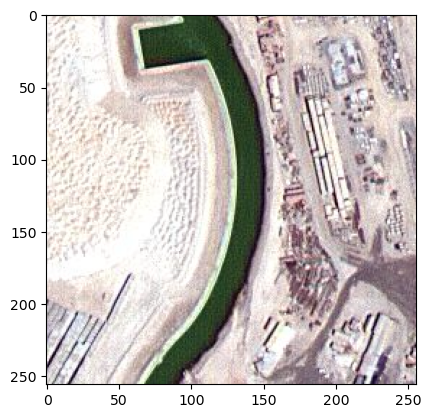

In [70]:
plt.imshow(image_dataset[0])

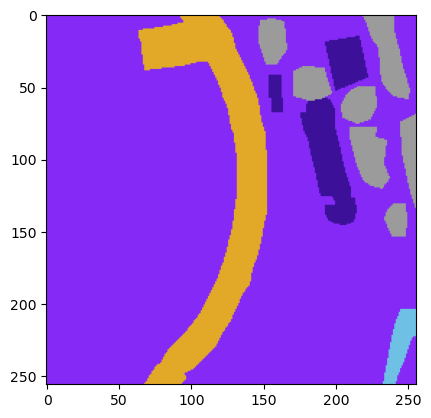

In [71]:
plt.imshow(mask_dataset[0])

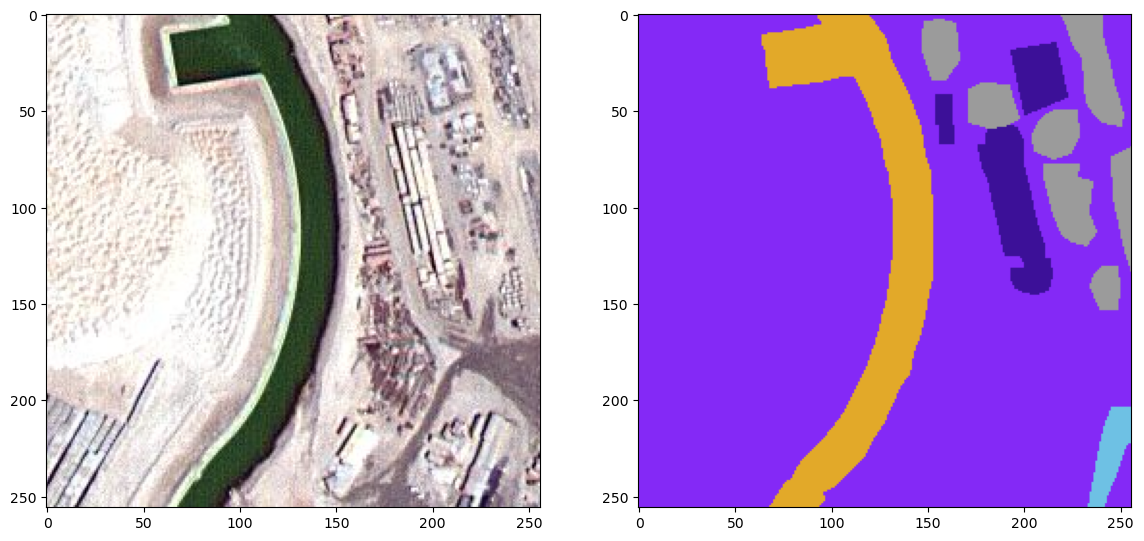

In [72]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[0])
plt.subplot(122)
plt.imshow(mask_dataset[0])

# Random Image

In [73]:
import random

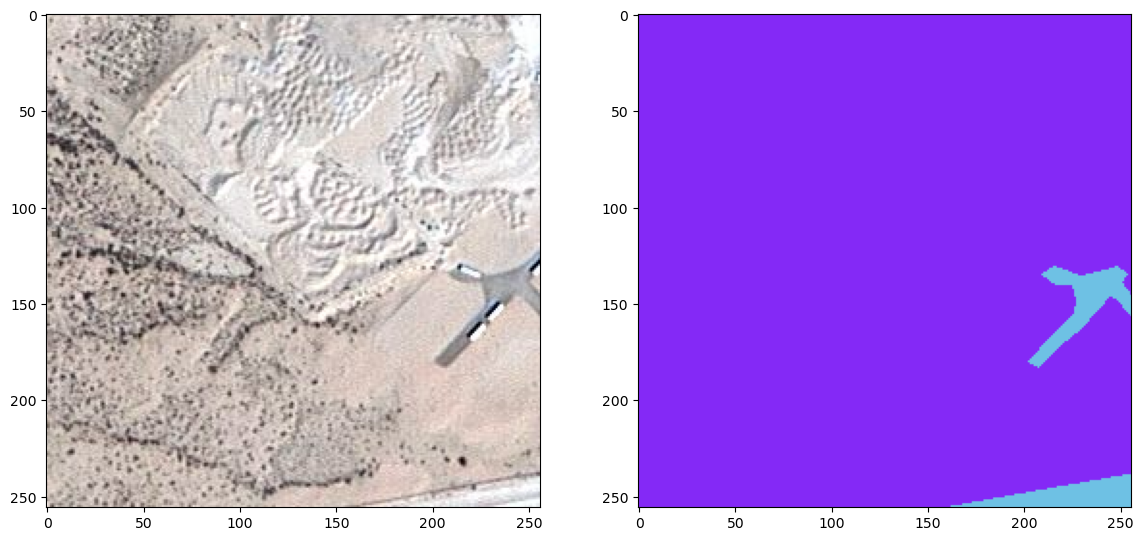

In [75]:
random_image_id = random.randint(0,len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

# Processing Mask Image Labels

Applying One-Hot Encoding with Labels Hex image type to set RGB/label

# Explaination:

In [81]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building=np.array(tuple(int(class_building[i:i+2],16)for i in (0,2,4)))
print(class_building)
 

[ 60  16 152]


In [82]:
class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land=np.array(tuple(int(class_land[i:i+2],16)for i in (0,2,4)))
print(class_land)

[132  41 246]


In [83]:
class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road=np.array(tuple(int(class_road[i:i+2],16)for i in (0,2,4)))
print(class_road)

[110 193 228]


In [85]:
class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation=np.array(tuple(int(class_vegetation[i:i+2],16)for i in (0,2,4)))
print(class_vegetation)

[254 221  58]


In [86]:
class_water = '#E2A929'
class_water= class_water.lstrip('#')
class_water=np.array(tuple(int(class_water[i:i+2],16)for i in (0,2,4)))
print(class_water)

[226 169  41]


In [87]:
class_unlabelled = '#9B9B9B'
class_unlabelled= class_unlabelled.lstrip('#')
class_unlabelled=np.array(tuple(int(class_unlabelled[i:i+2],16)for i in (0,2,4)))
print(class_unlabelled)

[155 155 155]


In [111]:
mask_dataset.shape[0]

735

# Explaination:

In [112]:
label = individual_patched_mask

In [122]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape , dtype = np.uint8)
    label_segment[np.all(label == class_water , axis = -1)] = 0
    label_segment[np.all(label == class_land , axis = -1)] = 1
    label_segment[np.all(label == class_road , axis = -1)] = 2
    label_segment[np.all(label == class_building , axis = -1)] = 3
    label_segment[np.all(label == class_vegetation , axis = -1)] = 4
    label_segment[np.all(label == class_unlabelled , axis = -1)] = 5
    label_segment = label_segment[:,:,0]
    
    return label_segment

In [123]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [124]:
print(len(labels))

735


In [125]:
labels = np.array(labels)

In [126]:
labels[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [127]:
labels = np.expand_dims(labels,axis = 3)

In [128]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [129]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [130]:
print("Total unique labels based on masks: " , format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


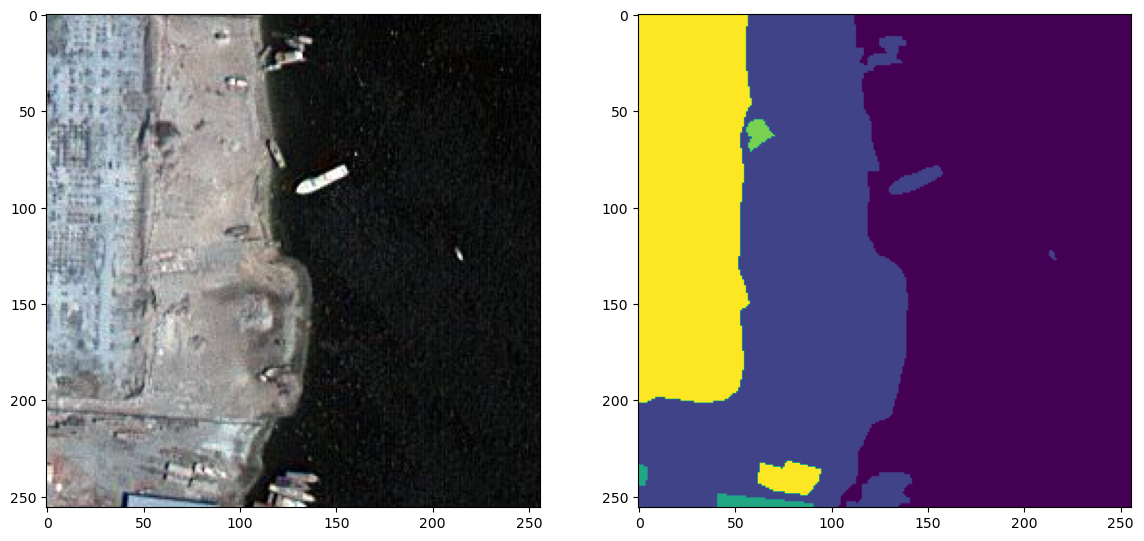

In [131]:
random_image_id = random.randint(0,len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [132]:
master_training_dataset = image_dataset

In [135]:
total_classes = len(np.unique(labels))
print(total_classes)

6


In [138]:
!pip install tensorflow

In [139]:
from tensorflow.keras.utils import to_categorical

# Explaination

In [141]:
labels_categorical_dataset = to_categorical(labels , num_classes = total_classes)
labels_categorical_dataset.shape

(735, 256, 256, 6)

In [133]:
from sklearn.model_selection import train_test_split

    X_train: This typically refers to the feature (input) data that you use to train your machine learning model. It includes all the input variables or features that your model will use to make predictions.

    X_test: This is another set of feature data that you use to evaluate the performance of your trained model. It's data that the model has not seen during training, and it helps you understand how well your model generalizes to new, unseen data.

    y_train: This corresponds to the labels or output values associated with the X_train data. It's the ground truth that your model learns to predict during training.

    y_test: Similarly, this corresponds to the labels or output values associated with the X_test data. It's used to evaluate how well your trained model predicts the correct labels on new, unseen data.

In [142]:
X_train , X_test , y_train , y_test = train_test_split(master_training_dataset ,labels_categorical_dataset,test_size = 0.15 , random_state = 100 )

# random_state:

In [143]:
print(X_train.shape)
print(y_train.shape)
print(y_test .shape)
print(X_test.shape)


(624, 256, 256, 3)
(624, 256, 256, 6)
(111, 256, 256, 6)
(111, 256, 256, 3)


In [148]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [150]:
print(image_height)
print(image_width )
print(image_channels)
print(total_classes)


256
256
3
6
